In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ned=pd.read_csv('/home/sagarika/belgrade/agn/mass-agn-main/HW3/r_mag.csv')
ned

,#name,Name_1,#johnson_R_mag,log(Mbh/Msun),log(eddington ratio),source
0,3C,48,15.555,8.8,-0.30,NED
1,3C,213.1,18.390,9.1,-0.42,NED
2,3C,268.3,19.580,7.8,NaN,NED
3,3C,293,13.590,8.0,-1.78,NED
4,3C,303.1,17.910,8.4,NaN,NED
5,3C,346,16.730,8.8,-2.54,NED
6,PKS,1549-79,17.480,8.0,-0.32,simbad
7,PKS,2004-447,18.000,7.6,-0.26,simbad
8,4C,12.5,15.200,7.8,NaN,NED
9,3C,459,17.950,8.5,NaN,NED


Here I have taken the R magnitude (johnson_R_mag) of objects  from the NED and SIMBAD database.
The log(Mbh/Msun) and log(eddington ratio) values are taken from Wu et al. 2009 and used for comparison wth computed values later on. 

In [3]:
l_Mbh_Msun = ( -0.5 *(-ned['#johnson_R_mag']) - 2.74)   # here R mag is taken to be negative as is uaually the norm.
l_Mbh_Msun           #log10(Mbh/Msun)

0    5.0375
1    6.4550
2    7.0500
3    4.0550
4    6.2150
5    5.6250
6    6.0000
7    6.2600
8    4.8600
9    6.2350
Name: #johnson_R_mag, dtype: float64

In [4]:
Mbh_Msun = 10**l_Mbh_Msun
Mbh_Msun                  #Mbh/Msun

0    1.090184e+05
1    2.851018e+06
2    1.122018e+07
3    1.135011e+04
4    1.640590e+06
5    4.216965e+05
6    1.000000e+06
7    1.819701e+06
8    7.244360e+04
9    1.717908e+06
Name: #johnson_R_mag, dtype: float64

In [5]:
M_sun = 1.989e33  # in grams
M_bh=Mbh_Msun*M_sun
M_bh

0    2.168377e+38
1    5.670675e+39
2    2.231695e+40
3    2.257537e+37
4    3.263133e+39
5    8.387543e+38
6    1.989000e+39
7    3.619385e+39
8    1.440903e+38
9    3.416920e+39
Name: #johnson_R_mag, dtype: float64

In [6]:
#log Mbh = 2.79(±0.37) log(Lbol/Ledd ) − 10.29(±0.28)

In [7]:
l_lbol_ledd = (l_Mbh_Msun +(10.29*(-0.28)))/(2.79*(-0.37))  #Not giving close results if only log(Mbh) is taken and also -ve values
l_lbol_ledd

0   -2.088831
1   -3.461978
2   -4.038361
3   -1.137073
4   -3.229488
5   -2.657948
6   -3.021215
7   -3.273080
8   -1.916885
9   -3.248862
Name: #johnson_R_mag, dtype: float64

Text(0, 0.5, 'log $M_{bh}/M_{\\odot}$')

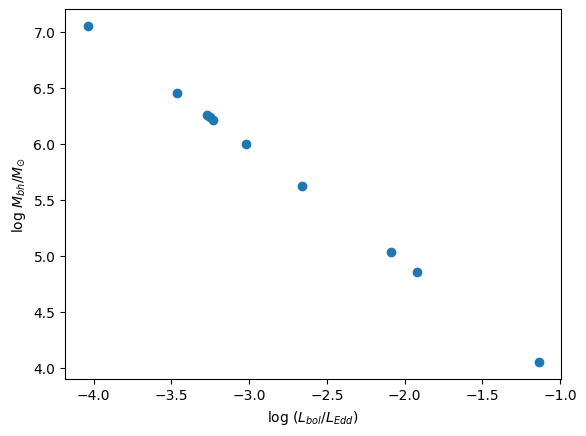

In [8]:
plt.scatter(l_lbol_ledd,l_Mbh_Msun )
plt.xlabel("log ($L_{bol}/L_{Edd}$)")
plt.ylabel("log $M_{bh}/M_{\odot}$")

Here we obtain a negative correlation between the two quantities but in McLure & Dunlop (2002)Figure 7 we see a positive correlation between the two quantities

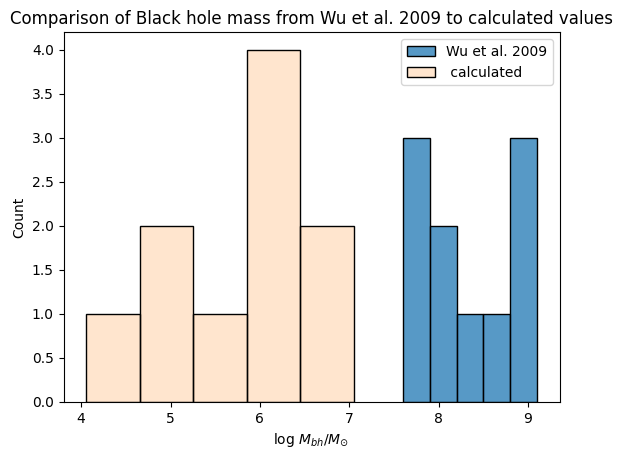

In [9]:
#Comparsion of Black hole mass from Wu et al.(2009) to calculated value

M_Wu=ned['log(Mbh/Msun)']
sns.histplot(M_Wu, label="Wu et al. 2009")
sns.histplot(l_Mbh_Msun, alpha =0.2, label =" calculated ")
plt.xlabel("log $M_{bh}/M_{\odot}$")
plt.title("Comparison of Black hole mass from Wu et al. 2009 to calculated values")
plt.legend()

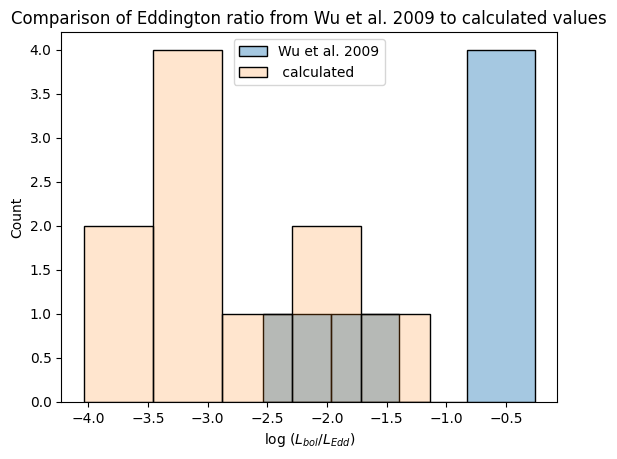

In [10]:
#Comparsion of Eddington ration from Wu et al.(2009) to calculated value

edd_Wu=ned['log(eddington ratio)']
sns.histplot(edd_Wu, alpha=0.4, label="Wu et al. 2009")
sns.histplot(l_lbol_ledd, alpha =0.2, label =" calculated ")
plt.xlabel("log ($L_{bol}/L_{Edd}$)")
plt.title("Comparison of Eddington ratio from Wu et al. 2009 to calculated values")
plt.legend()

Text(0.5, 1.0, 'Black Hole mass vs R Mag')

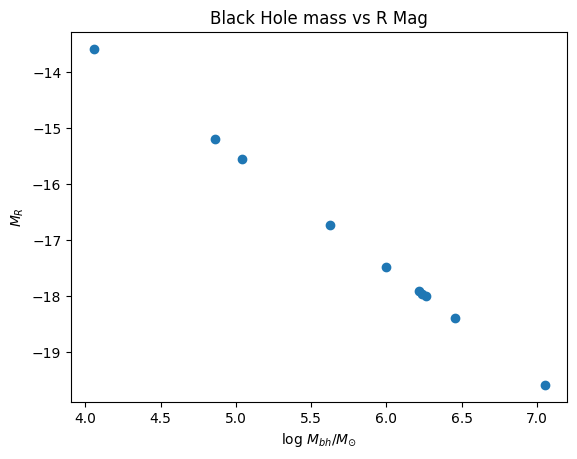

In [11]:
plt.scatter(l_Mbh_Msun, -1*ned['#johnson_R_mag'])
plt.xlabel('log $M_{bh}/M_{\odot}$')
plt.ylabel('$M_{R}$')
plt.title("Black Hole mass vs R Mag")

It is seen here that this relation shows a negative slope or negative correlation between the two variables whereas in Figure 4 of McLure & Dunlop (2002) we see a positive correlation between the two quantities. 